# Lab 3: Data Filtering on Time Series Realizations
### Joe Barry
### May 1, 2021

## Background

A filter is something which reduces or transforms for future use. The goal is to remove something we do not want and retain what is useful to us. In time series analysis, we use filters on time series realizations to simplify them, or remove unwanted frequencies.


Filters can be helpful for cleaning data or isolating a specific aspect of them. For example, if we wanted to see the change in rate of COVID vaccinations over time, we could look at daily vaccination rate data. However, if people are more likely to get vaccinated on weekends, it can be difficult to identify trends with the naked eye. If we have a moving 7-day average vaccination rate, we can eliminate the cyclical nature and see more clearly if the rate is increasing or decreasing. This moving average is an example of a filter: it removes the high frequency data and leaves behind what is useful to us.


## Methods

I will be using the same dataset that I plan on using for our final project: an audio file for the song, "My Sweet Lord", by George Harrison. Due to the high sampling rate of the file (44,100 samples per second), I am going to use solely one 10 second snippet of the song for the purposes of this lab, and reduce the number of samples tenfold (4,410 samples per second).

First, we will import the necessary libraries.

In [15]:
install.packages('tuneR', dependencies = TRUE)
install.packages('tswge')

library('tuneR')
library('tswge')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘PolynomF’, ‘waveslim’, ‘astsa’




Next we will read the mp3 file in, pick out our snippet, and lower the sampling rate. The file is stored in the 'tmp' folder.

In [16]:
full.mp3 <- readMP3('/tmp/MySweetLord.mp3')
mp3 <- full.mp3[2646000:3087000] #1:00 to 1:10
num.samples <- length(mp3@left) # For reduction
indices <- seq(1, (num.samples - 1), 10)
mp3.reduced <- mp3[indices]
s1 <- mp3.reduced@left # We only want one channel of the audio; the left side.
m1 <- s1 / 2^(mp3.reduced@bit - 1) # Maps amplitudes on range from -1 to 1.
num.samples <- length(mp3.reduced@left) # For future use
my.time <- (0:(num.samples - 1)) / mp3.reduced@samp.rate

In [17]:
num.samples

[1] 44100

With a sampling rate of 4,410 over ten seconds, our realization now has 44,100 samples.

 The first filter we will apply to this realization is a low pass filter, which removes high frequencies from the dataset (functionally similar to the COVID vaccination example above). Next, we will apply a high pass filter, which conversely removes low frequencies.

In [23]:
low.pass <- butterworth.wge(m1, 4, type = "low", cutoff = .01, plot = FALSE)
high.pass <- butterworth.wge(m1, 4, type = "high", cutoff = .1, plot = FALSE)

## Results

First, for the sake of comparison, we will plot the realization, autocorrelation, periodogram, and Parzen Window for our base realization.

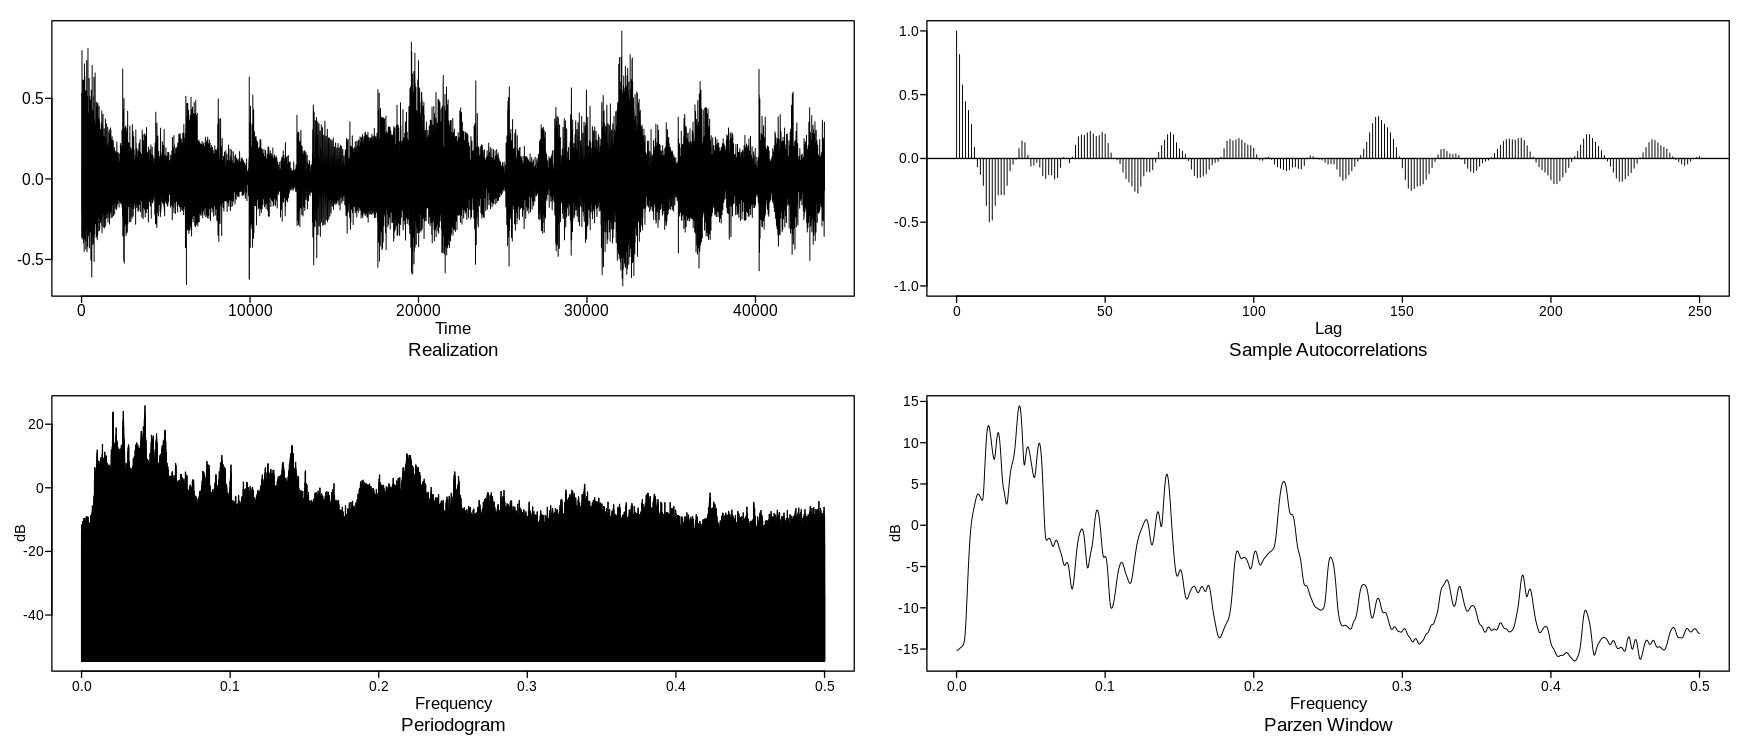

In [28]:
orig.plots <- plotts.sample.wge(m1, lag.max = 250)

And now, we can do the same for our high pass, then our low pass filters.

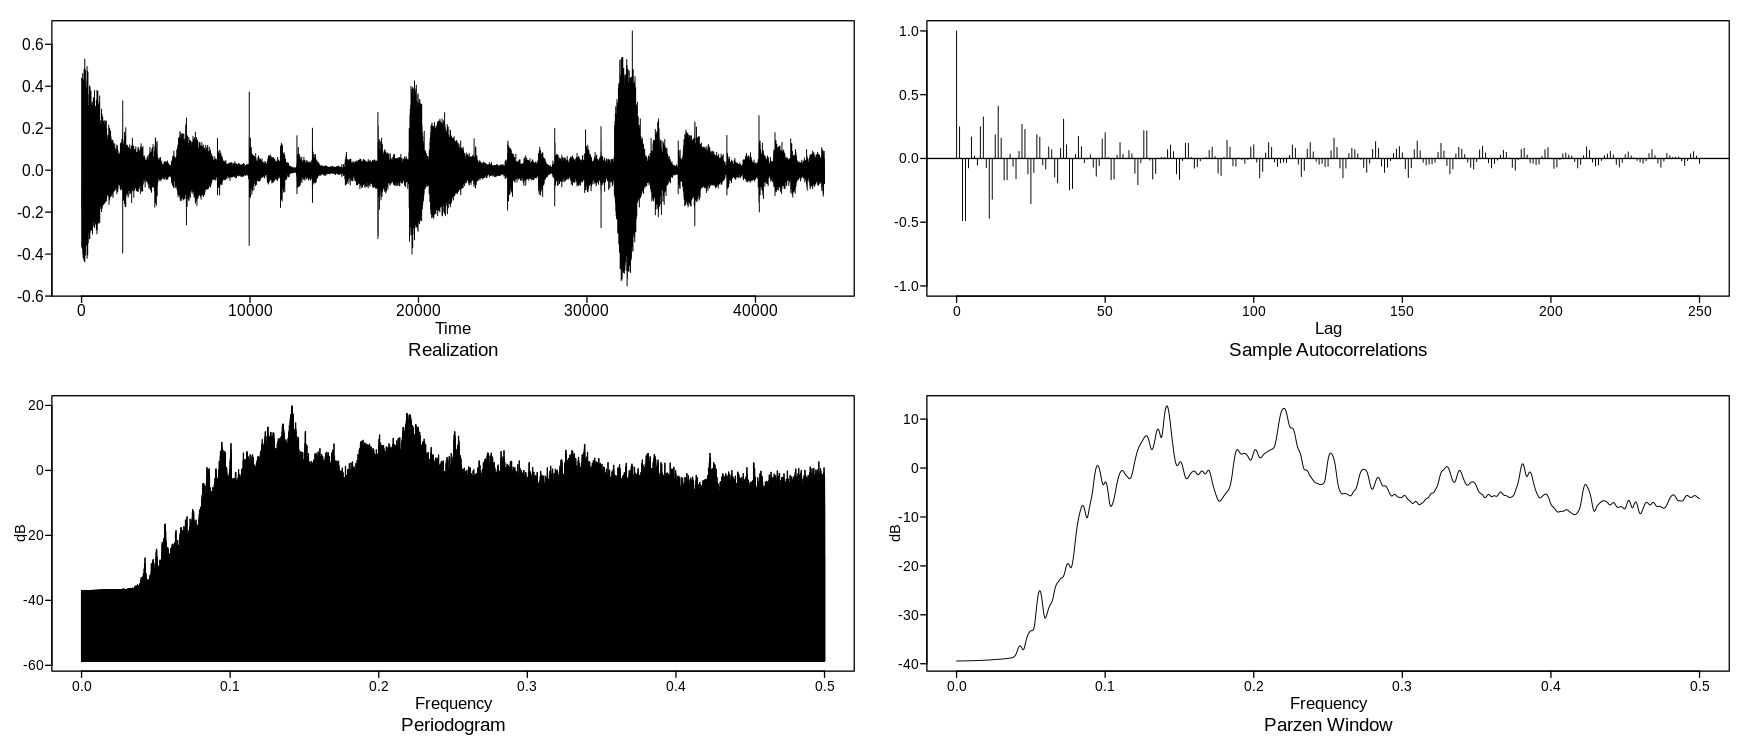

In [29]:
high.plots <- plotts.sample.wge(high.pass$x.filt, lag.max = 250)

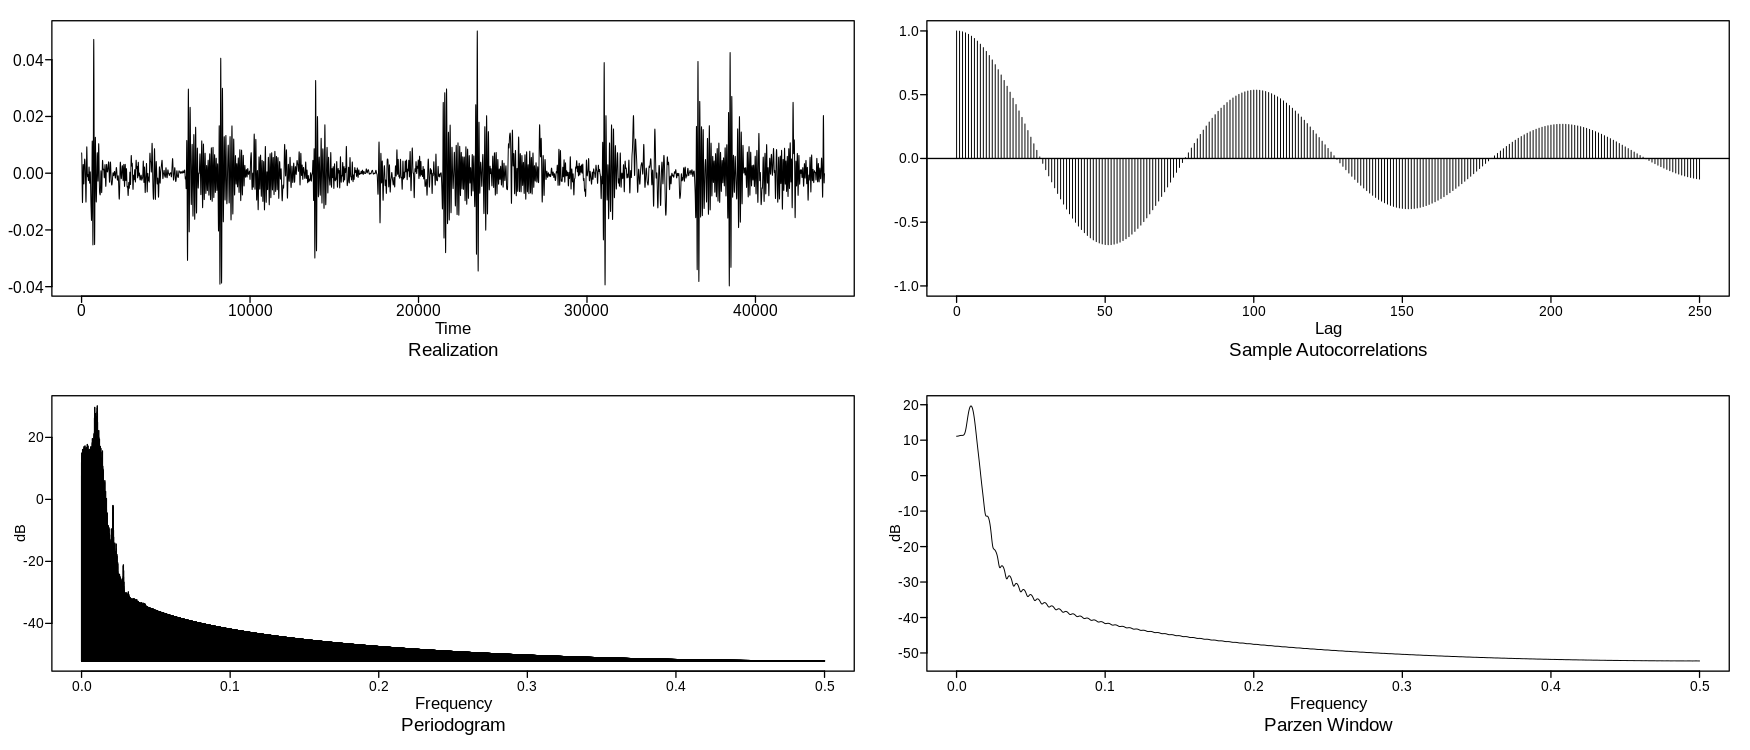

In [30]:
low.plots <- plotts.sample.wge(low.pass$x.filt, lag.max = 250)

## Discussion and Conclusion

In the original dataset, it is difficult to pinpoint a specific cyclical behavior because music, by its nature, consists of many different frequencies overlapping. We can identify the dominant frequency by using the periodogram data.


In [34]:
which.max(orig.plots$db)
4410*orig.plots$freq[1881]

[1] 1881

[1] 188.1

Considering our sampling rate of 4,100 per second, this frequency is at 188.1 Hz. This equates to $F\#_3$, or the F sharp below middle C on a piano (MTU). This makes sense, as the two chords being played at this point are an F#m and a B, both of which contain this note.


The high pass filter removes this frequency from the realization. From the periodogram and Parzen Window, as expected, lower frequencies are clearly less present (the left side of these graphs).

In [36]:
which.max(high.plots$db)
4410*high.plots$freq[6244]

[1] 6244

[1] 624.4

With this realization, our new dominant frequency is at 624.4 Hz. This translates to $D\#_5$, or the D sharp one octave above middle C. This makes sense, as we would expect a high pass filter to only let through higher notes. This note is present in the B chord mentioned above, so once again, it fits the music.

For the low pass filter, we would expect the opposite effect; low notes allowed through. In this case, based on the graphs, there is clearly one dominant frequency around every 100 samples, as evidenced by the single peak in the periodogram, and the wave-like pattern in the acf plot. We can pinpoint this frequency using the same method.

In [38]:
which.max(low.plots$db)
4410*low.plots$freq[467]

[1] 467

[1] 46.7

46.7 Hz translates to $F\#_1. This is exactly two octaves below the note identified by the original realization (one quarter the wavelength). As stated, this note is in both chords played in this snippet, although it is likely a different instrument playing that note which is being picked up in this realization.

By relating our realization to music, the cyclic behavior could be captured in the notes being played. As might have been expected, the dominant frequency in the low pass filter was the lowest note, and the dominant frequency in the high pass filter was the highest note. However, both were frequencies which must have been present in the original realization, as evidenced by the fact that each fit the key that the original song was being played in.

## Sources

- MTU's frequency to musical note chart: https://pages.mtu.edu/~suits/notefreqs.html
- My Sweet Lord (Demo) on Youtube: https://www.youtube.com/watch?v=mHeu2jPoaLw
- note: I'm using the demo version because there are fewer instruments playing and less production, hopefully making it easier to identify frequencies.
- note 2: Chord ID's are done by myself. The following link corroborates them, although it is transposed down two semitones for whatever reason: https://tabs.ultimate-guitar.com/tab/george-harrison/my-sweet-lord-chords-106200
